**CASE DS PARTE 1**

Leia o arquivo CSV.
- Remova todas as linhas que contêm valores NA/NULL ou ausentes.
- Extraia a data usando expressões regulares (regex) da coluna “Date”, alocando as saídas em uma coluna chamada “data_formatada”. Respeite o formar dd/mm/aaaa.
- Extraia a hora usando expressões regulares (regex) da coluna “Date”, alocando as saídas em uma coluna chamada “hora_formatada”. Respeite o formato hh:mm:ss.
- Realize uma análise exploratória básica dos dados, fornecendo as principais informações das colunas presentes neste CSV.
- Gere pelo menos um tipo de visualização de dados relevante para o conjunto de dados e o descreva.
- Submeta seu script junto com quaisquer arquivos de dados utilizados, em um arquivo zipado.
- Dica: Use R ou Python para facilitar a manipulação dos dados.

https://gist.github.com/Miaomeow/59c2bfae1e907875afeef9e3330b0ce7

###IMPORTANDO CONTEÚDO DO DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

###TRAZENDO O ARQUIVO CSV

In [3]:
df_original = pd.read_csv('/content/drive/MyDrive/CASE/air_quality.csv', sep=',')

In [4]:
df_original.head(5)

,Date,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
0,2014-01-01 01:00,6,7,9,8.0,6.0,6.0,6.0,8,6.0,6.0,6,4.0,10,7,9.0
1,2014-01-01 02:00,6,7,9,7.0,6.0,5.0,6.0,8,5.0,5.0,6,4.0,10,7,9.0
2,2014-01-01 03:00,6,6,8,7.0,6.0,5.0,6.0,7,5.0,5.0,6,5.0,9,6,8.0
3,2014-01-01 04:00,6,6,8,7.0,6.0,5.0,6.0,7,4.0,5.0,6,4.0,9,5,8.0
4,2014-01-01 05:00,5,5,7,6.0,5.0,5.0,NaN,7,5.0,5.0,5,4.0,8,5,7.0


In [ ]:
df_original.describe

###REMOVENDO DADOS NA/NULL/AUSENTES

In [7]:
# Contando valores nulos
df_original.isnull().sum()

Date                0
Central/Western     0
Eastern             0
Kwun Tong           0
Sham Shui Po        1
Kwai Chung          8
Tsuen Wan           9
Yuen Long          12
Tuen Mun            0
Tung Chung         11
Tai Po             17
Sha Tin             0
Tap Mun            12
Causeway Bay        0
Central             0
Mong Kok            3
dtype: int64

In [8]:
df_tratado = df_original.dropna()

In [9]:
df_tratado.isnull().sum()

Date               0
Central/Western    0
Eastern            0
Kwun Tong          0
Sham Shui Po       0
Kwai Chung         0
Tsuen Wan          0
Yuen Long          0
Tuen Mun           0
Tung Chung         0
Tai Po             0
Sha Tin            0
Tap Mun            0
Causeway Bay       0
Central            0
Mong Kok           0
dtype: int64

###CONVERTENDO A DATA E CRIANDO DUAS NOVAS COLUNAS (DATA E HORA)

In [ ]:
# Convertendo a coluna "Date" para datetime
df_tratado.loc[:, 'Date'] = pd.to_datetime(df_tratado['Date'], errors='coerce')

In [ ]:
# Criando novas colunas para data e hora
df_tratado.loc[:, 'Data_formatada'] = df_tratado['Date'].dt.date
df_tratado.loc[:, 'Hora_formatada'] = df_tratado['Date'].dt.time

In [ ]:
# Formatando a coluna "Data" como "dia/mês/ano"
df_tratado.loc[:, 'Data'] = df_tratado['Date'].dt.strftime('%d/%m/%Y')
# Formatando a coluna "Hora" como "hh:mm:ss"
df_tratado.loc[:, 'Hora'] = df_tratado['Date'].dt.strftime('%H:%M:%S')

In [13]:
# Reordenando as colunas
nova_ordem_colunas = ['Data', 'Hora', 'Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung', 'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin', 'Tap Mun', 'Causeway Bay', 'Central', 'Mong Kok']
df_tratado = df_tratado[nova_ordem_colunas]

In [14]:
# Exibindo o df
df_tratado.head(5)

,Data,Hora,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
0,01/01/2014,01:00:00,6,7,9,8.0,6.0,6.0,6.0,8,6.0,6.0,6,4.0,10,7,9.0
1,01/01/2014,02:00:00,6,7,9,7.0,6.0,5.0,6.0,8,5.0,5.0,6,4.0,10,7,9.0
2,01/01/2014,03:00:00,6,6,8,7.0,6.0,5.0,6.0,7,5.0,5.0,6,5.0,9,6,8.0
3,01/01/2014,04:00:00,6,6,8,7.0,6.0,5.0,6.0,7,4.0,5.0,6,4.0,9,5,8.0
6,01/01/2014,07:00:00,5,5,6,6.0,5.0,5.0,6.0,7,5.0,5.0,5,4.0,7,5,6.0


###ANÁLISE EXPLORATÓRIA DE DADOS

In [15]:
# Descrevendo o df
df_tratado.describe

<bound method NDFrame.describe of            Data      Hora  Central/Western  Eastern  Kwun Tong  Sham Shui Po  \
0    01/01/2014  01:00:00                6        7          9           8.0   
1    01/01/2014  02:00:00                6        7          9           7.0   
2    01/01/2014  03:00:00                6        6          8           7.0   
3    01/01/2014  04:00:00                6        6          8           7.0   
6    01/01/2014  07:00:00                5        5          6           6.0   
..          ...       ...              ...      ...        ...           ...   
655  28/01/2014  08:00:00                4        4          4           4.0   
656  28/01/2014  09:00:00                4        4          4           4.0   
657  28/01/2014  10:00:00                4        4          4           4.0   
658  28/01/2014  11:00:00                4        4          4           4.0   
659  28/01/2014  12:00:00                4        4          5           5.0   

     

In [16]:
# Verificando o tipo dos dados
df_tratado.dtypes

Data                object
Hora                object
Central/Western      int64
Eastern              int64
Kwun Tong            int64
Sham Shui Po       float64
Kwai Chung         float64
Tsuen Wan          float64
Yuen Long          float64
Tuen Mun             int64
Tung Chung         float64
Tai Po             float64
Sha Tin              int64
Tap Mun            float64
Causeway Bay         int64
Central              int64
Mong Kok           float64
dtype: object

## CONVERTENDO DADOS FLOAT PARA INT

In [17]:
# Selecionando colunas a serem convertidas para INT
colunas_float = ['Sham Shui Po', 'Kwai Chung', 'Tsuen Wan', 'Yuen Long', 'Tung Chung', 'Tai Po', 'Tap Mun', 'Mong Kok']
df_tratado[colunas_float] = df_tratado[colunas_float].astype(int)

In [18]:
# Verificando o tipo dos dados após conversão
df_tratado.dtypes

Data               object
Hora               object
Central/Western     int64
Eastern             int64
Kwun Tong           int64
Sham Shui Po        int64
Kwai Chung          int64
Tsuen Wan           int64
Yuen Long           int64
Tuen Mun            int64
Tung Chung          int64
Tai Po              int64
Sha Tin             int64
Tap Mun             int64
Causeway Bay        int64
Central             int64
Mong Kok            int64
dtype: object

In [19]:
# Exibindo df
df_tratado.head(5)

,Data,Hora,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Tap Mun,Causeway Bay,Central,Mong Kok
0,01/01/2014,01:00:00,6,7,9,8,6,6,6,8,6,6,6,4,10,7,9
1,01/01/2014,02:00:00,6,7,9,7,6,5,6,8,5,5,6,4,10,7,9
2,01/01/2014,03:00:00,6,6,8,7,6,5,6,7,5,5,6,5,9,6,8
3,01/01/2014,04:00:00,6,6,8,7,6,5,6,7,4,5,6,4,9,5,8
6,01/01/2014,07:00:00,5,5,6,6,5,5,6,7,5,5,5,4,7,5,6


In [20]:
# Explorando dados numéricos
df_tratado['Eastern'].describe()

count    594.000000
mean       4.653199
std        1.292447
min        2.000000
25%        4.000000
50%        5.000000
75%        5.750000
max        9.000000
Name: Eastern, dtype: float64

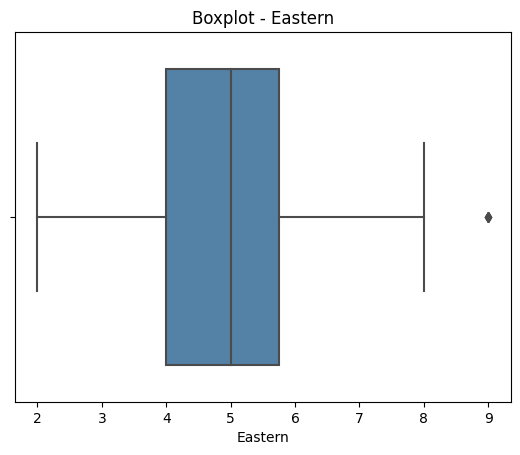

In [21]:
# Boxplot
srn.boxplot(x=df_tratado['Eastern'], color='SteelBlue')
plt.title('Boxplot - Eastern')
plt.show()

In [22]:
agrupado = df_tratado.groupby(['Central/Western']).size()
agrupado

Central/Western
2      2
3     50
4    179
5    122
6    138
7     60
8     37
9      6
dtype: int64

In [23]:
# Calculando a média
media = sts.mean(df_tratado['Central/Western'])
media

5.181818181818182

In [24]:
# Calculando a mediana
mediana = sts.median(df_tratado['Central/Western'])
mediana

5.0

In [25]:
# Calculando a moda
moda = sts.mode(df_tratado['Central/Western'])
moda

4

In [26]:
# Calculando os quartis quantile([0.25, 0.5, 0.75])
quartis = df_tratado['Central/Western']
quartil1 = quartis.quantile(0.25)
mediana = quartis.quantile(0.5)
quartil3 = quartis.quantile(0.75)

In [27]:
# Calculando a amplitude interquartil (IQR) usando a diferença entre o terceiro e primeiro quartis
iqr = quartil3 - quartil1

In [28]:
# Exibindo os resultados
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")
print(f"Primeiro Quartil: {quartil1}")
print(f"Mediana: {mediana}")
print(f"Terceiro Quartil: {quartil3}")
print(f"IQR: {iqr}")

Média: 5.181818181818182
Mediana: 5.0
Moda: 4
Primeiro Quartil: 4.0
Mediana: 5.0
Terceiro Quartil: 6.0
IQR: 2.0


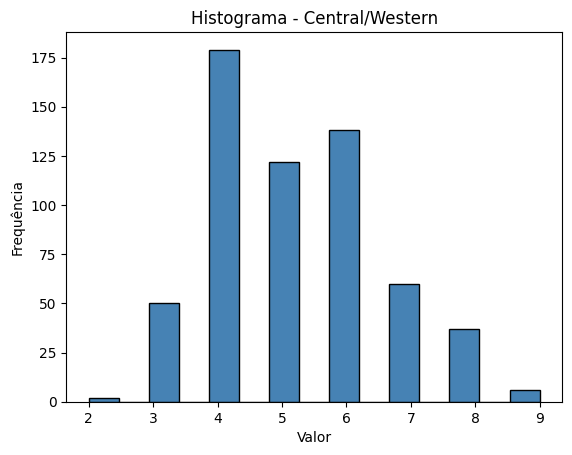

In [29]:
# Histograma
plt.hist(df_tratado['Central/Western'], bins='auto', edgecolor='black', color='SteelBlue')
plt.title('Histograma - Central/Western')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

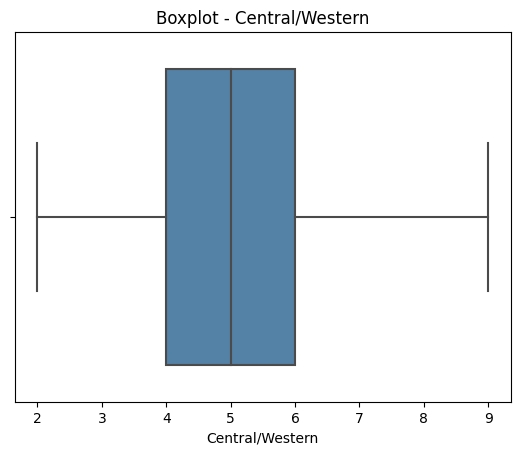

In [30]:
# Boxplot
srn.boxplot(x=df_tratado['Central/Western'], color='SteelBlue')
plt.title('Boxplot - Central/Western')
plt.show()

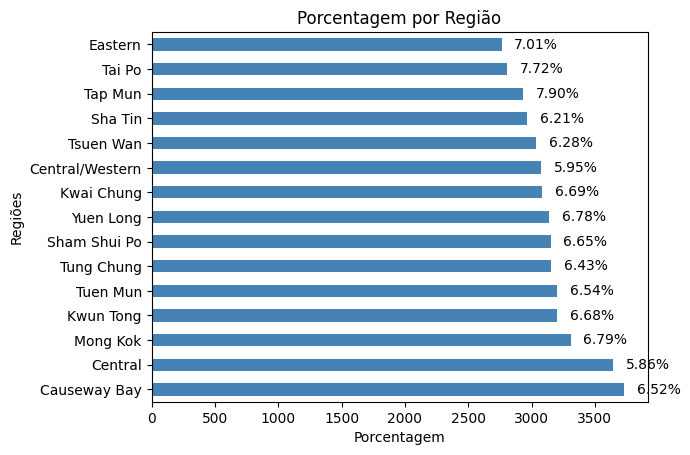

In [31]:
# Selecionando as colunas numéricas
df_colunas = ['Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung', 'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin', 'Tap Mun', 'Causeway Bay', 'Central', 'Mong Kok']

# Contando a ocorrência de cada valor nas colunas de interesse
contagem_tipo = df_tratado[df_colunas].sum()

# Calculando a proporção percentual
percentual = contagem_tipo / contagem_tipo.sum() * 100

# Ordenando os dados pela contagem decrescente
contagem_tipo_ordenada = contagem_tipo.sort_values(ascending=False)

# Plotando o gráfico de barras horizontais
ax = contagem_tipo_ordenada.plot.barh(color='SteelBlue')

# Adicionando os valores à direita das barras
for i, (count, percent) in enumerate(zip(contagem_tipo_ordenada, percentual)):
    ax.text(count + 100, i, f"{percent:.2f}%", ha='left', va='center', color='black')

# Adicionando rótulos e título
plt.xlabel('Porcentagem')
plt.ylabel('Regiões')
plt.title('Porcentagem por Região')

# Exibindo o gráfico
plt.show()
